In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

Initial Questions
1. Distribution of redemption status with respect to coupon, customer and campaign?
2. What is the trend in the campaign duration?
3. How many customers whose information is not present?
4. What is the trend in the Customer transactions?

### Redemptions

In [2]:
trainset = pd.read_csv("../data/train/train.csv", index_col='id')
trainset.head()

,campaign_id,coupon_id,customer_id,redemption_status
id,,,,
1,13,27,1053,0
2,13,116,48,0
6,9,635,205,0
7,13,644,1050,0
9,8,1017,1489,0


In [3]:
group_by_redemption = trainset.groupby('redemption_status').agg({'coupon_id': 'nunique', 'customer_id': 'nunique', 'redemption_status': 'count'})
group_by_redemption.columns = ['coupons', 'customers', 'count']
group_by_redemption = group_by_redemption.reset_index()
group_by_redemption

,redemption_status,coupons,customers,count
0,0,866,1428,77640
1,1,239,247,729


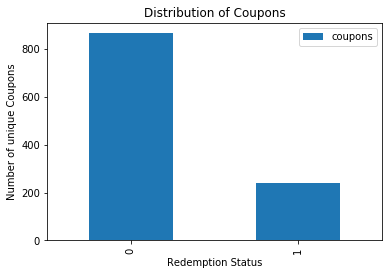

In [4]:
group_by_redemption.plot('redemption_status', 'coupons', kind='bar')
_ = plt.xlabel("Redemption Status")
_ = plt.ylabel("Number of unique Coupons")
_ = plt.title("Distribution of Coupons")
plt.savefig('figure/coupon_distribution.png', bbox_inches="tight")
plt.show()

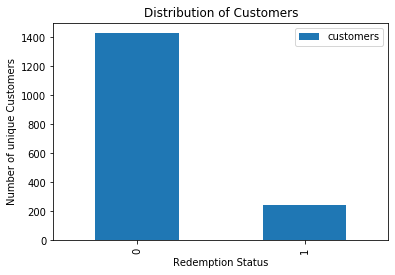

In [5]:
group_by_redemption.plot('redemption_status', 'customers', kind='bar')
_ = plt.xlabel("Redemption Status")
_ = plt.ylabel("Number of unique Customers")
_ = plt.title("Distribution of Customers")
plt.savefig('figure/customer_distribution.png', bbox_inches="tight")
plt.show()

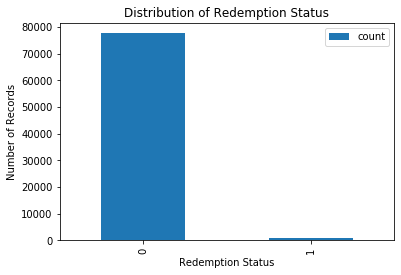

In [6]:
group_by_redemption.plot('redemption_status', 'count', kind='bar')
_ = plt.xlabel("Redemption Status")
_ = plt.ylabel("Number of Records")
_ = plt.title("Distribution of Redemption Status")
plt.savefig('figure/redemption_distribution.png', bbox_inches="tight")
plt.show()

Below are the findings from the above distributions
1. There are 627 coupons which are not redeemed by any customers
2. There are 1181 customers who has not redeemed any coupons
3. The data is highly Imbalanced

### Campaigns

In [7]:
campaign_data = pd.read_csv('../data/train/campaign_data.csv', parse_dates=['start_date', 'end_date'], dayfirst=True)
campaign_data['duration'] = (campaign_data['end_date'] - campaign_data['start_date']).dt.days
campaign_data = campaign_data.sort_values('start_date')
campaign_data.head()

,campaign_id,campaign_type,start_date,end_date,duration
27,26,X,2012-08-12,2012-09-21,40
26,27,Y,2012-08-25,2012-10-27,63
25,28,Y,2012-09-16,2012-11-16,61
24,29,Y,2012-10-08,2012-11-30,53
23,30,X,2012-11-19,2013-01-04,46


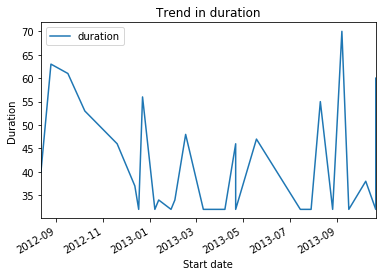

In [8]:
campaign_data.plot('start_date', 'duration')
_ = plt.xlabel("Start date")
_ = plt.ylabel("Duration")
_ = plt.title("Trend in duration")
plt.savefig('figure/duration_trend.png', bbox_inches="tight")
plt.show()

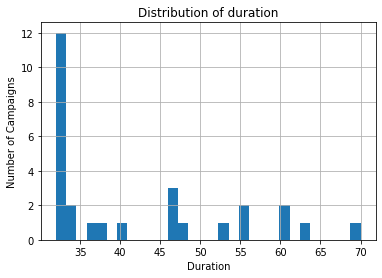

In [9]:
campaign_data.duration.hist(bins=30)
_ = plt.xlabel("Duration")
_ = plt.ylabel("Number of Campaigns")
_ = plt.title("Distribution of duration")
plt.savefig('figure/duration_distribution.png', bbox_inches="tight")
plt.show()

Below are the findings from the above plots
1. The duration of Campaigns in the initial days were longer
2. Later on, Campaigns with both short and long durations were started
3. Most of the campaigns fall in duration of 35 and less days
4. There is one Campaign with duration of 70 days

## Customer's Information

In [10]:
customer_data = pd.read_csv('../data/train/customer_demographics.csv')
customer_data.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


In [11]:
customer_info = trainset.merge(customer_data, how='left', on='customer_id')
customer_info['info_available'] = customer_info.family_size.notna()
customer_info.head()

,campaign_id,coupon_id,customer_id,redemption_status,age_range,marital_status,rented,family_size,no_of_children,income_bracket,info_available
0,13,27,1053,0,46-55,NaN,0.0,1,NaN,5.0,True
1,13,116,48,0,36-45,Married,0.0,2,NaN,3.0,True
2,9,635,205,0,46-55,Married,0.0,2,NaN,7.0,True
3,13,644,1050,0,NaN,NaN,NaN,NaN,NaN,NaN,False
4,8,1017,1489,0,46-55,Married,0.0,2,NaN,3.0,True


In [12]:
group_by_available = customer_info.groupby('info_available').agg({'customer_id': 'nunique', 'redemption_status': 'sum'})
group_by_available.columns = ['customers', 'redeemed']
group_by_available = group_by_available.reset_index()
group_by_available

,info_available,customers,redeemed
0,False,725,161
1,True,703,568


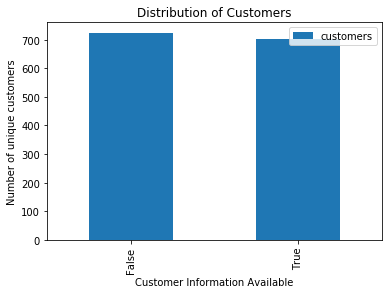

In [13]:
group_by_available.plot('info_available', 'customers', kind='bar')
_ = plt.xlabel('Customer Information Available')
_ = plt.ylabel('Number of unique customers')
_ = plt.title('Distribution of Customers')
plt.savefig('figure/information_customers_distribution.png', bbox_inches="tight")
plt.show()

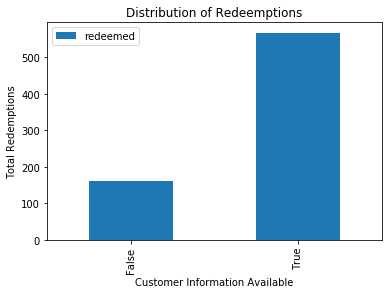

In [14]:
group_by_available.plot('info_available', 'redeemed', kind='bar')
_ = plt.xlabel('Customer Information Available')
_ = plt.ylabel('Total Redemptions')
_ = plt.title('Distribution of Redeemptions')
plt.savefig('figure/information_redeemed_distribution.png', bbox_inches="tight")
plt.show()

Below are the findings from the above plots
1. Almost 50% of customer's information is not available
2. Customer's whose information is available tends to redeem more coupons than customer's with no information

## Customer transactions

In [15]:
transaction_data = pd.read_csv('../data/train/customer_transaction_data.csv', parse_dates=['date'])
transaction_data['month'] = transaction_data.date.dt.month + transaction_data.date.dt.year.replace({2012: 0, 2013: 12})
transaction_data['coupon_discount'] = transaction_data['coupon_discount'] < 0
transaction_data.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,month
0,2012-01-02,1501,26830,1,35.26,-10.69,False,1
1,2012-01-02,1501,54253,1,53.43,-13.89,False,1
2,2012-01-02,1501,31962,1,106.50,-14.25,False,1
3,2012-01-02,1501,33647,1,67.32,0.00,False,1
4,2012-01-02,1501,48199,1,71.24,-28.14,False,1


In [16]:
group_by_date = transaction_data.groupby('month').agg({'customer_id': 'nunique', 'item_id': 'nunique', 'quantity': 'count', 'coupon_discount': 'sum'})
group_by_date.columns = ['customers', 'items', 'count', 'coupon_discount']
group_by_date = group_by_date.reset_index()
group_by_date.head()

,month,customers,items,count,coupon_discount
0,1,351,7432,12382,187.0
1,2,654,11482,25073,287.0
2,3,1050,16307,46730,476.0
3,4,1463,19801,68340,868.0
4,5,1444,20334,79093,923.0


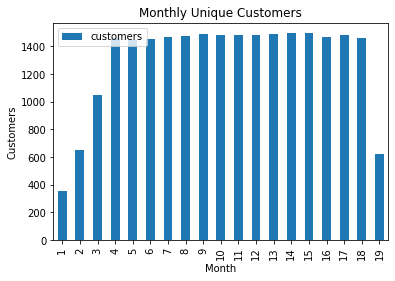

In [17]:
group_by_date.plot('month', 'customers', kind='bar')
_ = plt.xlabel('Month')
_ = plt.ylabel('Customers')
_ = plt.title('Monthly Unique Customers')
plt.savefig('figure/transactions_customers.png', bbox_inches="tight")
plt.show()

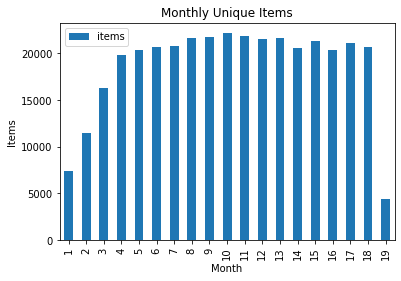

In [18]:
group_by_date.plot('month', 'items', kind='bar')
_ = plt.xlabel('Month')
_ = plt.ylabel('Items')
_ = plt.title('Monthly Unique Items')
plt.savefig('figure/transactions_items.png', bbox_inches="tight")
plt.show()

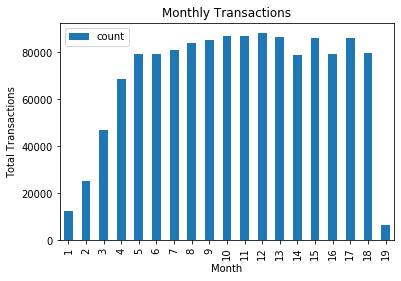

In [19]:
group_by_date.plot('month', 'count', kind='bar')
_ = plt.xlabel('Month')
_ = plt.ylabel('Total Transactions')
_ = plt.title('Monthly Transactions')
plt.savefig('figure/transactions_count.png', bbox_inches="tight")
plt.show()

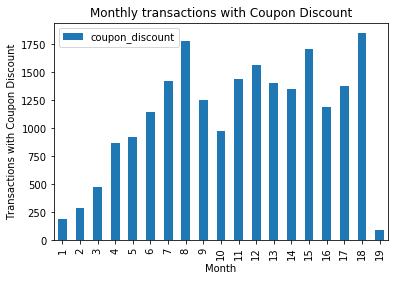

In [20]:
group_by_date.plot('month', 'coupon_discount', kind='bar')
_ = plt.xlabel('Month')
_ = plt.ylabel('Transactions with Coupon Discount')
_ = plt.title('Monthly transactions with Coupon Discount')
plt.savefig('figure/transactions_coupon_discount.png', bbox_inches="tight")
plt.show()

Below are the findings from the above plots
1. There are not much transaction in the initial 3 months, may be client has just started its business
2. Month 19 can't be considered in any analysis because it only contains 3 days transactions
3. Customers, Items and total transactions grew in initial 3 months and then remains almost stable
4. Transactions with coupon discount has fluctuations

# Summary

1. 78% coupons were never redeemed by any customers
2. 85% customers has never redeemed any coupons
3. 0.93% campaign, coupon and customer combination has positive redemption status
4. The client started with longer Campaigns and later on introduced campaigns with 35 or less days
5. There is one Campaign with duration of 70 days
6. 50% Customer's information is not available
7. Customers with information redeems more coupons than customers without any information
8. Initial 3 months were starting phase for the Client
9. Customers, Items and total transactions remained stable after initial 3 months
10. Transactions with coupon discount has fluctuations